## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных Boston Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...).

Свою копию вы сможете изменять и запускать.


#Необходимые ресурсы

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline

Boston Housing price regression dataset
https://keras.io/api/datasets/boston_housing/

- Образцы содержат 13 атрибутов домов в разных местах пригорода Бостона в конце 1970-х годов.

- Цели (Targets) - это средние значения домов в определенном месте (в тыс. $).

- Сами атрибуты определены на веб-сайте StatLib http://lib.stat.cmu.edu/datasets/boston.


Variables in order:

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000

 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

## Подготовка данных

**Загружаем данные**

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


**Просмотр данных**

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(404, 13)

In [5]:
x_test.shape

(102, 13)

In [6]:
x_train[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [7]:
y_train[:3]

array([15.2, 42.3, 50. ])

In [8]:
n = 0
print(x_train[n])
print(y_train[n])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


**Нормализация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [9]:
# Среднее значение для обучающего набора данных
mean = x_train.mean(axis=0)
# Стандартное отклонение для обучающего набора данных
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [10]:
print(x_train[n])
print(y_train[n])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


In [11]:
x_train.shape

(404, 13)

In [12]:
x_train.shape[1]

13

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

Конфигурация сети из примера - https://www.tensorflow.org/tutorials/keras/basic_regression

In [13]:
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, Adadelta

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

optimizer = Adam(lr=0.001)

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [15]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [16]:
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/200
12/12 - 1s - loss: 525.2700 - mae: 20.9291 - val_loss: 363.7571 - val_mae: 17.9214 - 1s/epoch - 88ms/step
Epoch 2/200
12/12 - 0s - loss: 347.0132 - mae: 16.4081 - val_loss: 176.4615 - val_mae: 11.9651 - 66ms/epoch - 6ms/step
Epoch 3/200
12/12 - 0s - loss: 163.8717 - mae: 10.2939 - val_loss: 59.2908 - val_mae: 6.4391 - 51ms/epoch - 4ms/step
Epoch 4/200
12/12 - 0s - loss: 85.8128 - mae: 7.0228 - val_loss: 29.8125 - val_mae: 4.6392 - 76ms/epoch - 6ms/step
Epoch 5/200
12/12 - 0s - loss: 68.2145 - mae: 6.0972 - val_loss: 19.4503 - val_mae: 3.7677 - 55ms/epoch - 5ms/step
Epoch 6/200
12/12 - 0s - loss: 52.6128 - mae: 5.3481 - val_loss: 16.6469 - val_mae: 3.5148 - 67ms/epoch - 6ms/step
Epoch 7/200
12/12 - 0s - loss: 46.3437 - mae: 4.9652 - val_loss: 12.9742 - val_mae: 2.9615 - 53ms/epoch - 4ms/step
Epoch 8/200
12/12 - 0s - loss: 39.6493 - mae: 4.6394 - val_loss: 12.4552 - val_mae: 2.8980 - 53ms/epoch - 4ms/step
Epoch 9/200
12/12 - 0s - loss: 42.9232 - mae: 4.8296 - val_loss: 13.784

## Проверяем работу модели на тестовом наборе данных

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 3ms/step - loss: 15.6413 - mae: 2.6128


In [18]:
scores

[15.64128589630127, 2.6128411293029785]

In [19]:
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Средняя абсолютная ошибка на тестовых данных: 2.6128


## Визуализация качества обучения

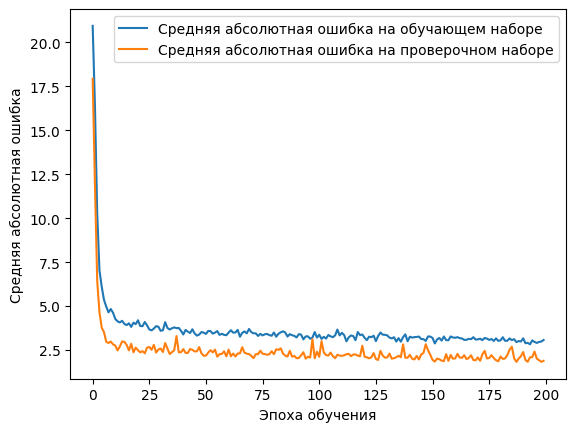

In [20]:
plt.plot(history.history['mae'], # mean_absolute_error
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], # val_mean_absolute_error
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [21]:
pred = model.predict(x_test).flatten()

4/4 [==============================] - 0s 4ms/step


In [22]:
print(pred)

[ 9.211167 18.633509 22.107405 33.044857 24.805674 22.06769  28.535826
 21.939768 18.85824  22.084137 19.4236   16.825003 15.423758 41.647552
 20.255114 21.344208 26.488379 20.272314 18.643927 23.645573 11.584399
 14.501176 21.46029  15.796064 18.436926 26.03889  28.995756 28.851347
 10.743722 20.340418 19.670153 14.120416 33.239494 24.777096 18.00323
  8.929436 15.124974 17.00858  19.137455 26.5776   32.90051  27.626207
 13.951793 42.484127 29.468714 25.682718 27.66394  17.910875 23.731857
 22.49045  36.177776 20.107763 11.403064 14.69492  35.472786 27.223755
 12.182126 46.7432   35.06308  23.833485 25.244814 16.177923 13.859357
 19.673143 23.376764 20.070623 13.034737 22.388752 13.296938  8.547995
 22.525295 31.578743 26.919432 13.145782 26.188263 18.182348 19.71657
 24.244583 34.017582 10.724777 21.350554 36.46731  16.450039 13.522566
 17.537882 18.697077 22.723871 19.052488 22.212828 31.008192 20.923517
 18.876272 27.787817 45.560776 34.784    18.500074 33.988575 44.324474
 26.7675

**Печатаем примеры результатов**

In [23]:
test_index=25
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 26.03889 , правильная стоимость: 23.0


## Визуализируем результаты предсказаний

График предсказаний

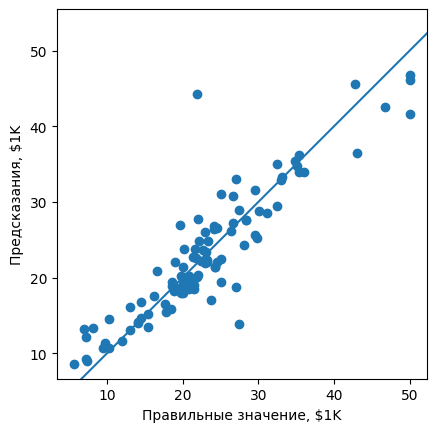

In [24]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Гистограмма ошибок

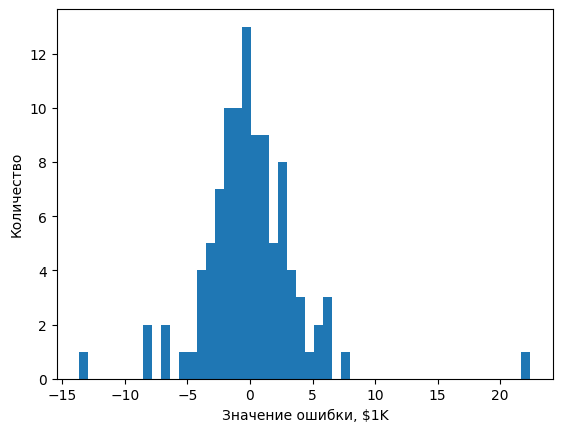

In [25]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

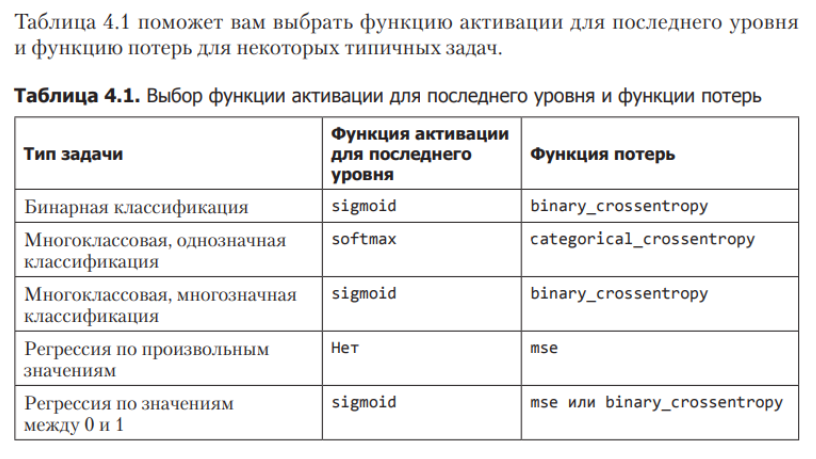

#Средняя абсолютная ошибка (mae)

**mae — mean
absolute error** (средняя абсолютная ошибка) - это абсолютное значение разности
между предсказанными и целевыми значениями (метками).
Как правило, испоьзуется для метрики в задаче регрессии.


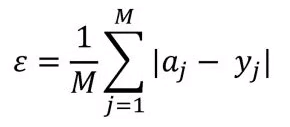

**mse — mean
squared error** (среднеквадратичная ошибка) - это квадрат разности между
предсказанными и целевыми значениями (метками). Как правило, испоьзуется для функции потерь.

# Средняя квадратичная ошибка (mse)

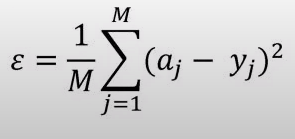

#Регуляризация - борьба с переобучением
Распространенные приемы регуляризации:

- Уменьшение размера сети - количество обучаемых параметров в модели - емкость модели (model capacity)
- Добавление регуляризации весов - уменьшении сложности сети путем ограничения значений ее весовых коэффициентов, что делает их распределение более равномерным
(подробнее читайте: Франсуа Шолле Глава 4 • Основы машинного обучения. 4.4.2. Добавление регуляризации весов)
- Добавление прореживания (dropout) к слою - удаление (присваивании нуля) случайно выбираемым признакам на этапе обучения
- Разделение данных на два набора: обучающий, проверочный
- Слой пакетной нормализации BatchNormalization

#Статьи
Обзор Keras для TensorFlow

https://habr.com/ru/post/482126/


#Задание
- Измените архитектуру нейронной сети:

 - Добавьте/удалите слои;

 - Измените количество нейронов;

- Добавьте дополнительную регуляризацию: Dropout, L2 или L1;

- Используйте разные оптимизаторы ('SGD', 'adam', 'adadelta').


- Изучите блокнот от The TensorFlow Authors

basic-regression.ipynb

https://colab.research.google.com/github/MarkDaoust/models/blob/add-regression-plots/samples/core/tutorials/keras/basic_regression.ipynb

- Изучите раздел 3.6. "Предсказание цен на дома:
пример регрессии" (стр. 111) в книге Ф. Шолле "Глубокое обучение на Python".  
- Сделайте оценку решения методом перекрестной проверки
по K блокам.


- Изучите раздел  4.4.2. Добавление регуляризации весов (стр. 136) в книге Ф. Шолле "Глубокое обучение на Python".

#Оценка решения методом перекрестной проверки  по K блокам

Источник: 3.6. Предсказание цен на дома:
пример регрессии, с. 111

### Загрузка набора данных для Бостона

In [26]:
# Загрузка набора данных для Бостона
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

###Подготовка данных

In [27]:
# Нормализация данных
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

###Определение модели

In [28]:
from keras import models
from keras import layers

Поскольку нам потребуется несколько
экземпляров одной и той же модели, мы
определили функцию для ее создания

In [29]:
def build_model():
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model

### Перекрестная проверка по K блокам (K-fold cross-validation)

- Разделение доступных данных на K блоков (обычно K = 4 или 5).
- Создание K идентичных моделей.
- Обучение каждой на K—1 блоках с оценкой по
оставшимся блокам.
- По полученным K оценкам вычисляется среднее значение,
которое принимается как оценка модели.

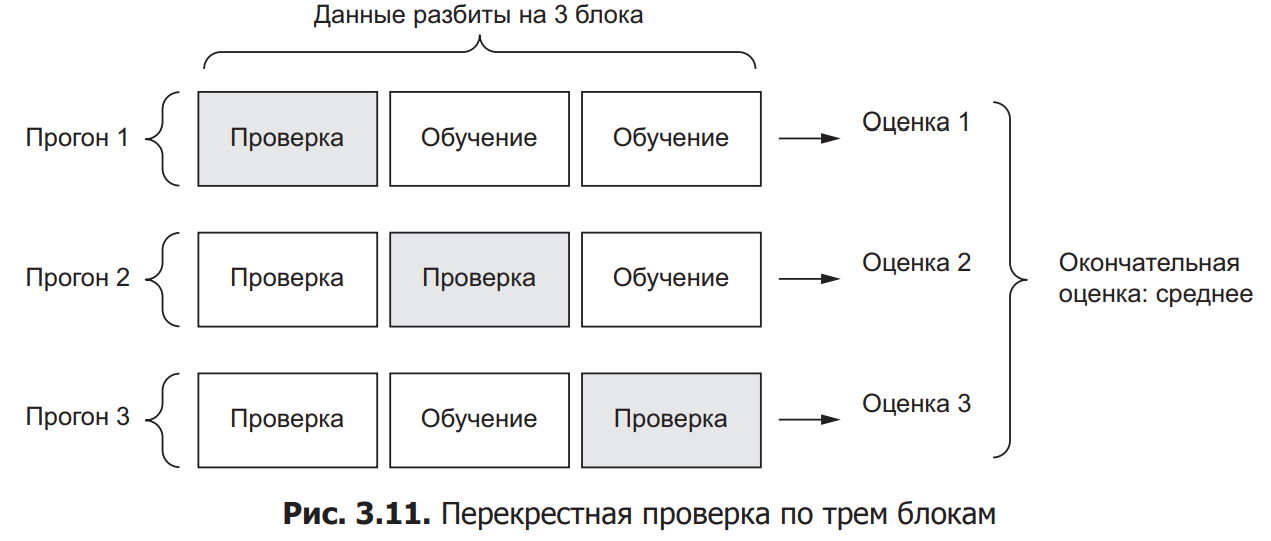

In [30]:
import numpy as np

In [31]:
k = 4 # определим число блоков
num_val_samples = len(train_data) // k # определим число образцов для каждого блока
num_epochs = 100 # определим число эпох для обучения
all_scores = [] # определим список для внесения результатов оценки
for i in range(k): # итерация по блокам
 print('processing fold #', i)
 # Подготовка проверочных данных: данные из блока с номером k
 val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # срез по образцам
 val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # метки
 # Подготовка обучающих данных: данные из остальных блоков
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # вызов функции для создания модели
 model = build_model()
 # обучение модели
 model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=1, verbose=0)
 # оценка модели по проверочным данным
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
 all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [32]:
# посмотрим на все результаты val_mae
all_scores

[2.2813684940338135, 2.694272518157959, 2.6814382076263428, 2.3928356170654297]

In [33]:
# посчитаем среднюю оценку val_mae
np.mean(all_scores)

2.5124787092208862

# Вычисление средних значений метрики mae для всех прогонов

In [34]:
num_epochs = 500 # определим число для обучения
all_mae_histories = [] # определим список для внесения результатов оценки
for i in range(k): # итерация по блокам
 print('processing fold #', i)
 # Подготовка проверочных данных: данные из блока с номером k
 val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # срез по образцам
 val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # метки
 # Подготовка обучающих данных: данные из остальных блоков
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # вызов функции для создания модели
 model = build_model()
 # обучение модели с сохранением истории обучения по 'val_mean_absolute_error'
 history = model.fit(partial_train_data, partial_train_targets,
                     validation_data=(val_data, val_targets),
                     epochs=num_epochs, batch_size=1, verbose=0)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:
len(all_mae_histories)

4

In [36]:
len(all_mae_histories[0])

500

###Создание истории последовательных средних оценок проверки по K блокам

In [37]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

###Формирование графика с оценками проверок

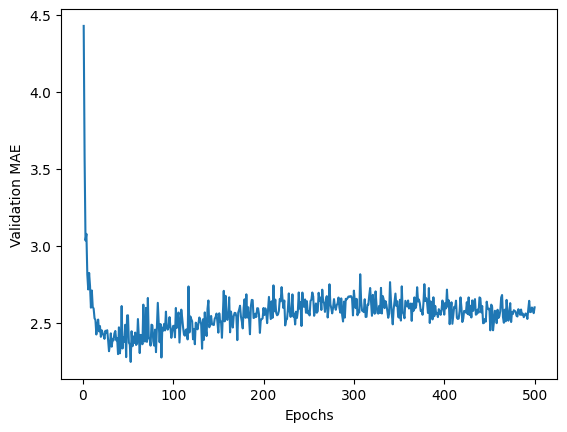

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Согласно этому графику, наилучшая оценка MAE достигается после 80 эпох. После
этого момента начинается переобучение.

##Обучение окончательной версии модели на всех данных

In [39]:
# Получить новую скомпилированную модель
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.1666 - mae: 2.9566


In [40]:
# окончательный результат
test_mae_score

2.9566450119018555

#Подведение итогов

- Регрессия выполняется с применением иных функций потерь, чем классификация. Для регрессии часто используется функция потерь, вычисляющая
среднеквадратичную ошибку (Mean Squared Error, MSE).
- Для регрессии используются иные метрики оценки, чем для
классификации; понятие точности неприменимо для регрессии, поэтому для
оценки качества часто применяется средняя абсолютная ошибка (Mean Absolute
Error, MAE).
- Когда признаки образцов на входе имеют значения из разных диапазонов, их
необходимо предварительно масштабировать.
- При небольшом объеме входных данных надежно оценить качество модели поможет метод перекрестной проверки по K блокам.
- При небольшом объеме обучающих данных предпочтительнее использовать маленькие сети с небольшим количеством промежуточных слоев (обычно с одним
или двумя), чтобы избежать серьезного переобучения.